## 1-Chargement des modules

In [0]:
from scipy.stats import binom
from scipy import signal
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
import seaborn as sns 
from scipy import stats
import statsmodels.graphics.tsaplots as tsa
import plotly.graph_objects as go
from ipywidgets import widgets
from IPython.display import display
import io
import requests


## 2- Chargement des données

In [0]:
url="https://opendata.ecdc.europa.eu/covid19/casedistribution/csv"


In [0]:
data = pd.read_csv(url, delimiter=',')

In [4]:
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,23/05/2020,23,5,2020,540,12,Afghanistan,AF,AFG,37172386.0,Asia
1,22/05/2020,22,5,2020,531,6,Afghanistan,AF,AFG,37172386.0,Asia
2,21/05/2020,21,5,2020,492,9,Afghanistan,AF,AFG,37172386.0,Asia
3,20/05/2020,20,5,2020,581,5,Afghanistan,AF,AFG,37172386.0,Asia
4,19/05/2020,19,5,2020,408,4,Afghanistan,AF,AFG,37172386.0,Asia


In [40]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path_cov = '/content/drive/My Drive/datas_cov/'

In [0]:
#data = pd.read_csv(path_cov + 'cas_coronavirus.csv', delimiter=';')

In [0]:
data = data.rename(columns={"dateRep": "DateRep", "day": "Day", "month": "Month", "year": "Year",
                     "cases": "Cases", "deaths": "Deaths", "countriesAndTerritories":"Countries and territories",
                     "geoId": "GeoId"})

In [6]:
data.head()

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId,countryterritoryCode,popData2018,continentExp
0,23/05/2020,23,5,2020,540,12,Afghanistan,AF,AFG,37172386.0,Asia
1,22/05/2020,22,5,2020,531,6,Afghanistan,AF,AFG,37172386.0,Asia
2,21/05/2020,21,5,2020,492,9,Afghanistan,AF,AFG,37172386.0,Asia
3,20/05/2020,20,5,2020,581,5,Afghanistan,AF,AFG,37172386.0,Asia
4,19/05/2020,19,5,2020,408,4,Afghanistan,AF,AFG,37172386.0,Asia


In [7]:
data.dtypes

DateRep                       object
Day                            int64
Month                          int64
Year                           int64
Cases                          int64
Deaths                         int64
Countries and territories     object
GeoId                         object
countryterritoryCode          object
popData2018                  float64
continentExp                  object
dtype: object

In [0]:
data['Datetime'] = pd.to_datetime(data['DateRep'], format="%d/%m/%Y")

In [9]:
data.tail()

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId,countryterritoryCode,popData2018,continentExp,Datetime
18825,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa,2020-03-25
18826,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0,Africa,2020-03-24
18827,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa,2020-03-23
18828,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0,Africa,2020-03-22
18829,21/03/2020,21,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0,Africa,2020-03-21


## 3-Cas de la France

In [0]:
data_france = data[data['Countries and territories'] == 'France'].sort_values('Datetime').reset_index()

In [11]:
data_france.head()

,index,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId,countryterritoryCode,popData2018,continentExp,Datetime
0,6349,31/12/2019,31,12,2019,0,0,France,FR,FRA,66987244.0,Europe,2019-12-31
1,6348,01/01/2020,1,1,2020,0,0,France,FR,FRA,66987244.0,Europe,2020-01-01
2,6347,02/01/2020,2,1,2020,0,0,France,FR,FRA,66987244.0,Europe,2020-01-02
3,6346,03/01/2020,3,1,2020,0,0,France,FR,FRA,66987244.0,Europe,2020-01-03
4,6345,04/01/2020,4,1,2020,0,0,France,FR,FRA,66987244.0,Europe,2020-01-04


In [0]:
for i in range(data_france.shape[0]):
    if i == 0:
        data_france.loc[i, "real_cases"] = data_france.loc[i, "Cases"]
        data_france.loc[i, "real_deaths"] = data_france.loc[i, "Deaths"]
    else:
        data_france.loc[i, "real_cases"] = data_france.loc[i-1, "real_cases"] + data_france.loc[i, "Cases"]
        data_france.loc[i, "real_deaths"] = data_france.loc[i-1, "real_deaths"] + data_france.loc[i, "Deaths"]

In [0]:
data_france = data_france.set_index('Datetime')

In [14]:
data_france.head()

,index,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId,countryterritoryCode,popData2018,continentExp,real_cases,real_deaths
Datetime,,,,,,,,,,,,,,
2019-12-31,6349,31/12/2019,31,12,2019,0,0,France,FR,FRA,66987244.0,Europe,0.0,0.0
2020-01-01,6348,01/01/2020,1,1,2020,0,0,France,FR,FRA,66987244.0,Europe,0.0,0.0
2020-01-02,6347,02/01/2020,2,1,2020,0,0,France,FR,FRA,66987244.0,Europe,0.0,0.0
2020-01-03,6346,03/01/2020,3,1,2020,0,0,France,FR,FRA,66987244.0,Europe,0.0,0.0
2020-01-04,6345,04/01/2020,4,1,2020,0,0,France,FR,FRA,66987244.0,Europe,0.0,0.0


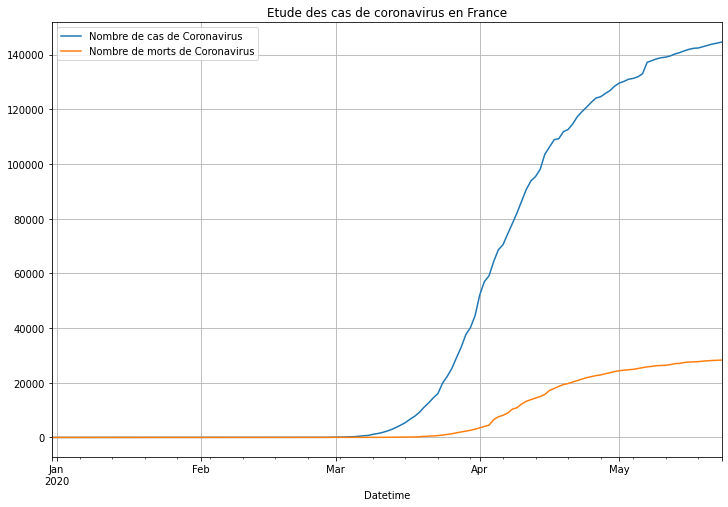

In [15]:
plt.figure(figsize = (12,8))
data_france['real_cases'].plot(label="Nombre de cas de Coronavirus")
data_france['real_deaths'].plot(label="Nombre de morts de Coronavirus")
plt.legend()
plt.title("Etude des cas de coronavirus en France")
plt.grid()
plt.show()

In [16]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_france.index,y=data_france['real_cases'],name="Cases",line_color='deepskyblue', opacity=0.8))
fig.add_trace(go.Scatter(x=data_france.index, y=data_france['real_deaths'],name="Deaths",line_color='dimgray',opacity=0.8))
fig.update_layout(title_text='Etude des cas de coronavirus en France', xaxis_rangeslider_visible=False)
fig.show()

## 4-Cas du monde

In [0]:
data_world= data.sort_values('Datetime').reset_index()

In [18]:
data_world.head()

,index,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId,countryterritoryCode,popData2018,continentExp,Datetime
0,12226,31/12/2019,31,12,2019,0,0,Nepal,NP,NPL,28087871.0,Asia,2019-12-31
1,14602,31/12/2019,31,12,2019,0,0,Russia,RU,RUS,144478050.0,Europe,2019-12-31
2,3413,31/12/2019,31,12,2019,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,3000.0,Other,2019-12-31
3,6204,31/12/2019,31,12,2019,0,0,Finland,FI,FIN,5518050.0,Europe,2019-12-31
4,1311,31/12/2019,31,12,2019,0,0,Azerbaijan,AZ,AZE,9942334.0,Europe,2019-12-31


In [0]:
for i in range(data_world.shape[0]):
    if i == 0:
        data_world.loc[i, "real_cases"] = data_world.loc[i, "Cases"]
        data_world.loc[i, "real_deaths"] = data_world.loc[i, "Deaths"]
    else:
        data_world.loc[i, "real_cases"] = data_world.loc[i-1, "real_cases"] + data_world.loc[i, "Cases"]
        data_world.loc[i, "real_deaths"] = data_world.loc[i-1, "real_deaths"] + data_world.loc[i, "Deaths"]

In [0]:
data_world = data_world.set_index('Datetime')

In [21]:
data_world.head()

,index,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId,countryterritoryCode,popData2018,continentExp,real_cases,real_deaths
Datetime,,,,,,,,,,,,,,
2019-12-31,12226,31/12/2019,31,12,2019,0,0,Nepal,NP,NPL,28087871.0,Asia,0.0,0.0
2019-12-31,14602,31/12/2019,31,12,2019,0,0,Russia,RU,RUS,144478050.0,Europe,0.0,0.0
2019-12-31,3413,31/12/2019,31,12,2019,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,3000.0,Other,0.0,0.0
2019-12-31,6204,31/12/2019,31,12,2019,0,0,Finland,FI,FIN,5518050.0,Europe,0.0,0.0
2019-12-31,1311,31/12/2019,31,12,2019,0,0,Azerbaijan,AZ,AZE,9942334.0,Europe,0.0,0.0


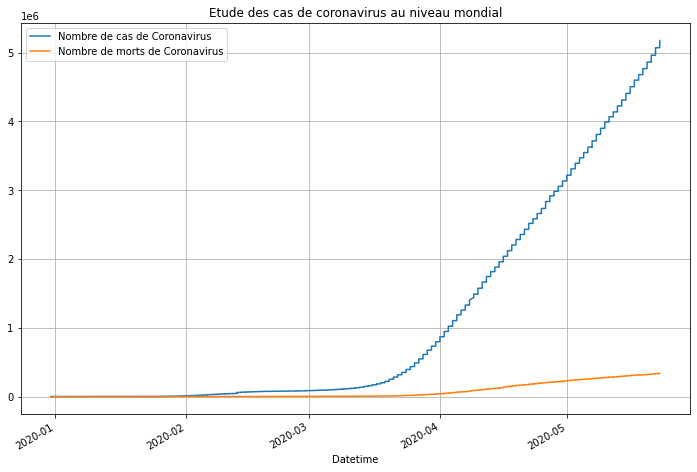

In [22]:
plt.figure(figsize = (12,8))
data_world['real_cases'].plot(label="Nombre de cas de Coronavirus")
data_world['real_deaths'].plot(label="Nombre de morts de Coronavirus")
plt.legend()
plt.title("Etude des cas de coronavirus au niveau mondial")
plt.grid()
plt.show()

In [23]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_world.index,y=data_world['real_cases'],name="Cases",line_color='deepskyblue', opacity=0.8))
fig.add_trace(go.Scatter(x=data_world.index, y=data_world['real_deaths'],name="Deaths",line_color='dimgray',opacity=0.8))
fig.update_layout(title_text='Etude des cas de coronavirus au Monde', xaxis_rangeslider_visible=False)
fig.show()

## 5-Généralisation pour tous les Pays

In [0]:
data_world= data.sort_values('Datetime').reset_index()

In [25]:
data_world.head()

,index,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId,countryterritoryCode,popData2018,continentExp,Datetime
0,12226,31/12/2019,31,12,2019,0,0,Nepal,NP,NPL,28087871.0,Asia,2019-12-31
1,14602,31/12/2019,31,12,2019,0,0,Russia,RU,RUS,144478050.0,Europe,2019-12-31
2,3413,31/12/2019,31,12,2019,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,3000.0,Other,2019-12-31
3,6204,31/12/2019,31,12,2019,0,0,Finland,FI,FIN,5518050.0,Europe,2019-12-31
4,1311,31/12/2019,31,12,2019,0,0,Azerbaijan,AZ,AZE,9942334.0,Europe,2019-12-31


In [0]:
ALL = 'ALL'
def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique

In [0]:
dropdown_year = widgets.Dropdown(options = unique_sorted_values_plus_ALL(data_world['Countries and territories']))

In [0]:
output = widgets.Output()
plot_output = widgets.Output()

In [0]:
def common_filtering(year):
    output.clear_output()
    plot_output.clear_output()
    
    if (year == ALL):
        common_filter = data_world
        for i in range(common_filter.shape[0]):
          if i == 0:
              common_filter.loc[i, "real_cases"] = common_filter.loc[i, "Cases"]
              common_filter.loc[i, "real_deaths"] = common_filter.loc[i, "Deaths"]
          else:
              common_filter.loc[i, "real_cases"] = common_filter.loc[i-1, "real_cases"] + common_filter.loc[i, "Cases"]
              common_filter.loc[i, "real_deaths"] = common_filter.loc[i-1, "real_deaths"] + common_filter.loc[i, "Deaths"]
        common_filter = common_filter.set_index('Datetime')
    else:
        common_filter = data_world[data_world['Countries and territories'] == year].sort_values('Datetime').reset_index()
        for i in range(common_filter.shape[0]):
          if i == 0:
              common_filter.loc[i, "real_cases"] = common_filter.loc[i, "Cases"]
              common_filter.loc[i, "real_deaths"] = common_filter.loc[i, "Deaths"]
          else:
              common_filter.loc[i, "real_cases"] = common_filter.loc[i-1, "real_cases"] + common_filter.loc[i, "Cases"]
              common_filter.loc[i, "real_deaths"] = common_filter.loc[i-1, "real_deaths"] + common_filter.loc[i, "Deaths"]
        common_filter = common_filter.set_index('Datetime')
        
    with output:
        display(common_filter)
    with plot_output:
      plt.figure(figsize = (12,8))
      common_filter['real_cases'].plot(label="Nombre de cas de Coronavirus")
      common_filter['real_deaths'].plot(label="Nombre de morts de Coronavirus")
      plt.legend()
      plt.title("Etude des cas de coronavirus : "+year)
      plt.grid()
      plt.show()
      """
      fig = go.Figure()
      fig.add_trace(go.Scatter(x=common_filter.index,y=common_filter['real_cases'],name="Nombre de cas de Coronavirus",line_color='deepskyblue', opacity=0.8))
      fig.add_trace(go.Scatter(x=common_filter.index, y=common_filter['real_deaths'],name="Nombre de morts de Coronavirus",line_color='dimgray',opacity=0.8))
      #fig.update_layout(title_text='Etude des cas de coronavirus au Monde'+year, xaxis_rangeslider_visible=False)
      fig.show()"""

In [0]:
def dropdown_year_eventhandler(change):
    common_filtering(change.new)

In [0]:
dropdown_year.observe(dropdown_year_eventhandler, names='value')

In [32]:
display(dropdown_year)
display(plot_output)

Dropdown(options=('ALL', 'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua_and_Ba…

Output()

In [33]:
display(output)

Output()

## 6-Map du nombre de cas par Pays

In [34]:
!pip install geopandas

     |████████████████████████████████| 931kB 5.0MB/s 
     |████████████████████████████████| 14.7MB 246kB/s 
     |████████████████████████████████| 10.9MB 50.9MB/s 


In [0]:
import geopandas as gpd
import json
import matplotlib as mpl
from bokeh.io import output_file, show, output_notebook, export_png
from bokeh.models import ColumnDataSource, GeoJSONDataSource, LinearColorMapper, ColorBar, Slider, HoverTool
from bokeh.plotting import figure
from bokeh.palettes import brewer
from bokeh.io import show
from bokeh.models import LogColorMapper
from bokeh.palettes import Viridis6 as palette

In [0]:
data_geo = gpd.read_file(path_cov + 'ne_110m_admin_0_countries.shp')[['ADMIN', 'ADM0_A3', 'geometry']]

In [0]:
data_geo.columns = ['country', 'country_code', 'geometry']

In [44]:
data_geo.head()

,country,country_code,geometry
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [0]:
data_geo['long'] =  data_geo['geometry'].centroid.x
data_geo['lat'] =  data_geo['geometry'].centroid.y

In [46]:
data_geo.head()

,country,country_code,geometry,long,lat
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",163.853165,-17.316309
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",34.752990,-6.257732
2,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",-12.137831,24.291173
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",-98.142381,61.469076
4,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",-112.599436,45.705628


In [0]:
data_w = data_world.groupby(['countryterritoryCode']).sum().drop(columns=['index', 'Day', 'Month', 'Year', 'popData2018']).reset_index()

In [48]:
data_w.head()

,countryterritoryCode,Cases,Deaths
0,ABW,101,3
1,AFG,9216,205
2,AGO,60,3
3,ALB,981,31
4,AND,762,51


In [49]:
data_geo.shape

(177, 5)

In [0]:
merged = data_geo.merge(data_w, left_on = 'country_code', right_on = 'countryterritoryCode')

In [51]:
merged.head()

,country,country_code,geometry,long,lat,countryterritoryCode,Cases,Deaths
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",163.853165,-17.316309,FJI,18,0
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",34.752990,-6.257732,TZA,509,21
2,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",-98.142381,61.469076,CAN,82469,6250
3,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",-112.599436,45.705628,USA,1601434,96007
4,Kazakhstan,KAZ,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",67.284611,48.191661,KAZ,7919,35


In [0]:
#Read data to json.
merged_json = json.loads(merged.to_json())

#Convert to String like object.
json_data = json.dumps(merged_json)

In [0]:
high = np.max(merged['Cases'])
low = np.min(merged['Cases'])

In [54]:
#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)

#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][8]

#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]

#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = low, high = high)

#Define custom tick labels for color bar.
tick_labels = {'0': '0', '5000': '5 000', '10000': '10 000', '50000':'50 000', '100000':'100 000', '150000':'150 000', '200000':'>200 000'}

#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)

#Create figure object.
p = figure(title = 'Cas de coronavirus dans le monde', plot_height = 600 , plot_width = 950, toolbar_location = None)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'Cases', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)

#Specify figure layout.
p.add_layout(color_bar, 'below')

#Display figure inline in Jupyter Notebook.
output_notebook()

#Display figure.
show(p)

In [55]:
#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)

#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][8]

#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]

#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = low, high = high)

#Define custom tick labels for color bar.
tick_labels = {'0': '0', '5000': '5 000', '10000': '10 000', '50000':'50 000', '100000':'100 000', '150000':'150 000', '200000':'>200 000'}

#Add hover tool
hover = HoverTool(tooltips = [ ('Pays ',' @country'),('Nombre de Cas ', ' @Cases'), ('Nombre de décès ', ' @Deaths')])

#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
                     border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)

#Create figure object.
p = figure(title = 'Cas de coronavirus dans le monde', plot_height = 600 , plot_width = 950, toolbar_location = None, tools = [hover])
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource, fill_color = {'field' :'Cases', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)

#Specify layout
p.add_layout(color_bar, 'below')

#Display plot inline in Jupyter notebook
output_notebook()

#Display plot
show(p)